In [ ]:
!git clone https://github.com/DataGlacier/DataSets.git

import pandas as pd

# Load datasets
cab_data = pd.read_csv("DataSets/Cab_Data.csv")
customer_data = pd.read_csv("DataSets/Customer_ID.csv")
transaction_data = pd.read_csv("DataSets/Transaction_ID.csv")
city_data = pd.read_csv("DataSets/City.csv")

# Preview
cab_data.head()


Cloning into 'DataSets'...
remote: Enumerating objects: 12, done.
remote: Total 12 (delta 0), reused 0 (delta 0), pack-reused 12 (from 1)
Receiving objects: 100% (12/12), 7.62 MiB | 12.25 MiB/s, done.
Resolving deltas: 100% (1/1), done.


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [ ]:
# Load the remaining datasets
customer_data = pd.read_csv("DataSets/Customer_ID.csv")
transaction_data = pd.read_csv("DataSets/Transaction_ID.csv")
city_data = pd.read_csv("DataSets/City.csv")

# Preview them
print("Customer Data:")
display(customer_data.head())

print("Transaction Data:")
display(transaction_data.head())

print("City Data:")
display(city_data.head())


Customer Data:


,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


Transaction Data:


,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


City Data:


,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [ ]:
# Step 1: Merge cab_data with transaction_data on Transaction ID
cab_txn = pd.merge(cab_data, transaction_data, on='Transaction ID', how='left')

# Step 2: Merge the result with customer_data on Customer ID
cab_txn_customer = pd.merge(cab_txn, customer_data, on='Customer ID', how='left')

# Step 3: Merge the result with city_data on City
master_df = pd.merge(cab_txn_customer, city_data, on='City', how='left')

# View the combined dataset
master_df.head()



,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,"814,885","24,701"
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,"814,885","24,701"
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,"814,885","24,701"
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,"814,885","24,701"
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536,"814,885","24,701"


In [ ]:
# Check for shape
print(f"Rows: {master_df.shape[0]}, Columns: {master_df.shape[1]}")

# Check for missing values
print("\nMissing values:")
print(master_df.isnull().sum())

# Check for duplicates
print("\nDuplicate rows:", master_df.duplicated().sum())

#  Check Data types
print("\nData types:")
print(master_df.dtypes)

# Quick stats for numerical columns
master_df.describe()


Rows: 359392, Columns: 14

Missing values:
Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Population            0
Users                 0
dtype: int64

Duplicate rows: 0

Data types:
Transaction ID          int64
Date of Travel          int64
Company                object
City                   object
KM Travelled          float64
Price Charged         float64
Cost of Trip          float64
Customer ID             int64
Payment_Mode           object
Gender                 object
Age                     int64
Income (USD/Month)      int64
Population             object
Users                  object
dtype: object


,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month)
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,42964.067998,22.567254,423.443311,286.190113,19191.652115,35.336705,15048.822937
std,1.268058e+05,307.467197,12.233526,274.378911,157.993661,21012.412463,12.594234,7969.409482
min,1.000001e+07,42371.000000,1.900000,15.600000,19.000000,1.000000,18.000000,2000.000000
25%,1.011081e+07,42697.000000,12.000000,206.437500,151.200000,2705.000000,25.000000,8424.000000
50%,1.022104e+07,42988.000000,22.440000,386.360000,282.480000,7459.000000,33.000000,14685.000000
75%,1.033094e+07,43232.000000,32.960000,583.660000,413.683200,36078.000000,42.000000,21035.000000
max,1.044011e+07,43465.000000,48.000000,2048.030000,691.200000,60000.000000,65.000000,35000.000000


<ipython-input-25-843370863>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_rides.index, y=total_rides.values, palette='pastel')


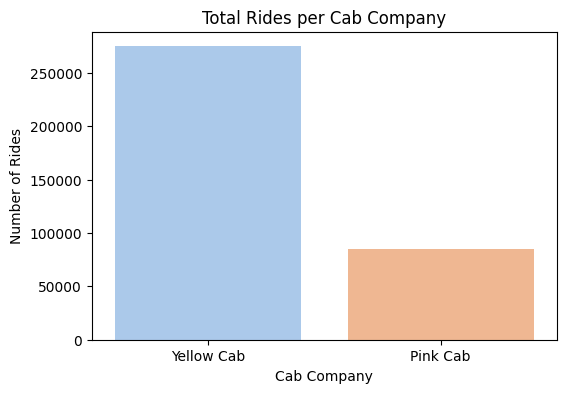

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

# Get total rides per company
total_rides = master_df['Company'].value_counts()

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(x=total_rides.index, y=total_rides.values, palette='pastel')
plt.title("Total Rides per Cab Company")
plt.ylabel("Number of Rides")
plt.xlabel("Cab Company")

# Save the chart
plt.savefig("ride_volume_chart.png")
plt.show()



In [ ]:
# Fix comma-formatted numbers and convert to int
master_df['Population'] = master_df['Population'].str.replace(',', '').astype(int)
master_df['Users'] = master_df['Users'].str.replace(',', '').astype(int)

# Confirm the data types are now correct
print(master_df.dtypes[['Population', 'Users']])


AttributeError: Can only use .str accessor with string values!

In [ ]:
# Safely convert to string, clean commas, and convert to int
master_df['Population'] = master_df['Population'].astype(str).str.replace(',', '', regex=True).astype(int)
master_df['Users'] = master_df['Users'].astype(str).str.replace(',', '', regex=True).astype(int)

# Confirm they're now integers
print(master_df.dtypes[['Population', 'Users']])



Population    int64
Users         int64
dtype: object


In [ ]:
# Add a new column for profit
master_df['Profit'] = master_df['Price Charged'] - master_df['Cost of Trip']

# Preview
master_df[['Company', 'Profit']].head()



,Company,Profit
0,Pink Cab,57.315
1,Pink Cab,23.666
2,Pink Cab,27.568
3,Pink Cab,25.798
4,Pink Cab,16.844


In [ ]:
# Total profit per company
total_profit = master_df.groupby('Company')['Profit'].sum()
print("✅ Total Profit per Company:\n", total_profit)

# Average profit per ride
avg_profit = master_df.groupby('Company')['Profit'].mean()
print("\n✅ Average Profit per Ride:\n", avg_profit)

# Total number of rides per company
total_rides = master_df['Company'].value_counts()
print("\n✅ Total Number of Rides per Company:\n", total_rides)



✅ Total Profit per Company:
 Company
Pink Cab      5.307328e+06
Yellow Cab    4.402037e+07
Name: Profit, dtype: float64

✅ Average Profit per Ride:
 Company
Pink Cab       62.652174
Yellow Cab    160.259986
Name: Profit, dtype: float64

✅ Total Number of Rides per Company:
 Company
Yellow Cab    274681
Pink Cab       84711
Name: count, dtype: int64


<ipython-input-21-4166377863>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_profit.index, y=total_profit.values, palette='viridis')


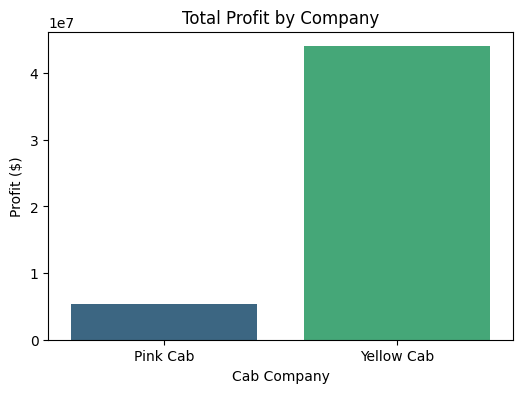

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar chart for total profit
plt.figure(figsize=(6,4))
sns.barplot(x=total_profit.index, y=total_profit.values, palette='viridis')
plt.title("Total Profit by Company")
plt.ylabel("Profit ($)")
plt.xlabel("Cab Company")
plt.savefig("total_profit_chart.png")
plt.show()


<ipython-input-12-2789356152>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_profit.index, y=avg_profit.values, palette='magma')


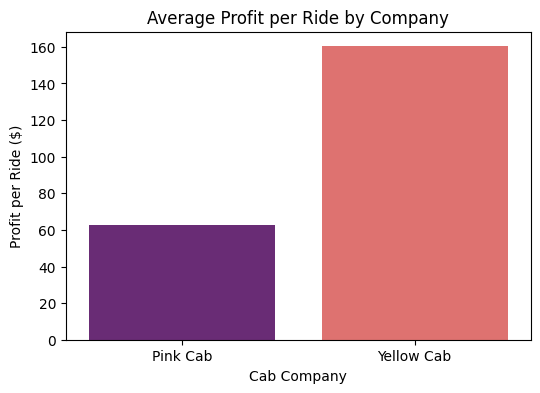

In [ ]:
# Bar chart showing the average profit per ride
plt.figure(figsize=(6,4))
sns.barplot(x=avg_profit.index, y=avg_profit.values, palette='magma')
plt.title("Average Profit per Ride by Company")
plt.ylabel("Profit per Ride ($)")
plt.xlabel("Cab Company")
plt.savefig("avg_profit_chart.png")
plt.show()


In [ ]:
# Profit by Gender
gender_profit = master_df.groupby('Gender')['Profit'].sum()

# Profit by Age Group
master_df['Age Group'] = pd.cut(master_df['Age'], bins=[0, 25, 40, 60, 100],
                                labels=['18-25', '26-40', '41-60', '60+'])
age_profit = master_df.groupby('Age Group')['Profit'].sum()

# Profit by Income Group
master_df['Income Group'] = pd.cut(master_df['Income (USD/Month)'],
                                   bins=[0, 8000, 15000, 30000, 50000],
                                   labels=['Low', 'Medium', 'High', 'Very High'])
income_profit = master_df.groupby('Income Group')['Profit'].sum()


<ipython-input-13-565485789>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_profit = master_df.groupby('Age Group')['Profit'].sum()
<ipython-input-13-565485789>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_profit = master_df.groupby('Income Group')['Profit'].sum()


<ipython-input-14-1572046998>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_profit.index, y=gender_profit.values, palette='coolwarm')


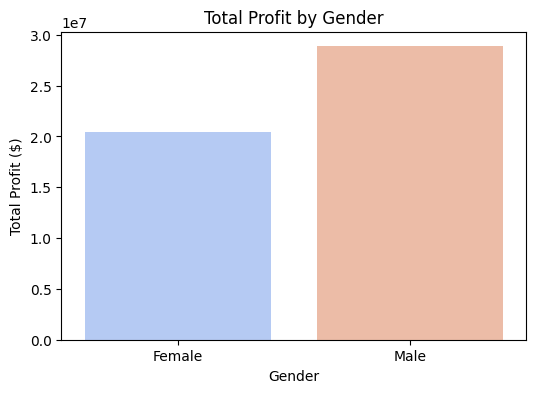

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Profit by Gender
gender_profit = master_df.groupby('Gender')['Profit'].sum()

# Plot
plt.figure(figsize=(6,4))
sns.barplot(x=gender_profit.index, y=gender_profit.values, palette='coolwarm')
plt.title("Total Profit by Gender")
plt.ylabel("Total Profit ($)")
plt.xlabel("Gender")
plt.savefig("gender_profit_chart.png")
plt.show()



<ipython-input-15-1861263457>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_profit.index, y=age_profit.values, palette='Blues_d')


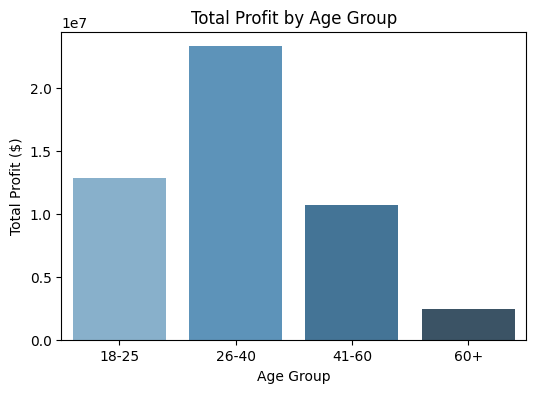

In [ ]:
# Plot by age group

plt.figure(figsize=(6,4))
sns.barplot(x=age_profit.index, y=age_profit.values, palette='Blues_d')
plt.title("Total Profit by Age Group")
plt.ylabel("Total Profit ($)")
plt.xlabel("Age Group")
plt.savefig("age_profit_chart.png")
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

<ipython-input-24-557441331>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=income_profit.index, y=income_profit.values, palette='Greens')


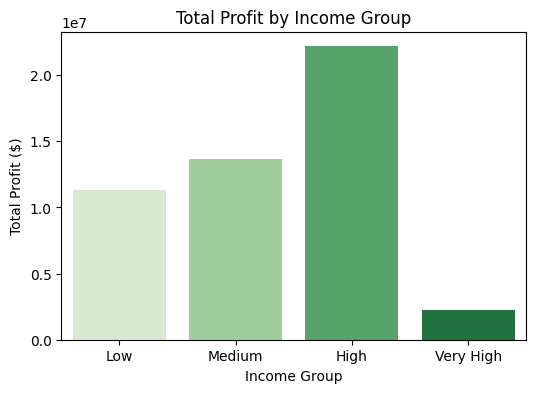

In [ ]:
# Plot by income group
plt.figure(figsize=(6,4))
sns.barplot(x=income_profit.index, y=income_profit.values, palette='Greens')
plt.title("Total Profit by Income Group")
plt.ylabel("Total Profit ($)")
plt.xlabel("Income Group")
plt.savefig("income_profit_chart.png")
plt.show()


In [ ]:
# Count number of rides per Customer per Company
retention_df = master_df.groupby(['Customer ID', 'Company']).size().reset_index(name='Ride Count')


retention_df.head()



,Customer ID,Company,Ride Count
0,1,Pink Cab,4
1,1,Yellow Cab,25
2,2,Pink Cab,4
3,2,Yellow Cab,36
4,3,Pink Cab,6


In [ ]:
# Customers with at least 5 rides
retained_5 = retention_df[retention_df['Ride Count'] >= 5]
retained_5_summary = retained_5['Company'].value_counts()

# Customers with at least 10 rides
retained_10 = retention_df[retention_df['Ride Count'] >= 10]
retained_10_summary = retained_10['Company'].value_counts()

# Display counts
print("✅ Customers with ≥ 5 Rides:\n", retained_5_summary)
print("\n✅ Customers with ≥ 10 Rides:\n", retained_10_summary)


✅ Customers with ≥ 5 Rides:
 Company
Yellow Cab    15780
Pink Cab       5515
Name: count, dtype: int64

✅ Customers with ≥ 10 Rides:
 Company
Yellow Cab    10715
Pink Cab        492
Name: count, dtype: int64


<ipython-input-23-3441185572>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=retained_5_summary.index, y=retained_5_summary.values, ax=axs[0], palette='Purples')
<ipython-input-23-3441185572>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=retained_10_summary.index, y=retained_10_summary.values, ax=axs[1], palette='Oranges')


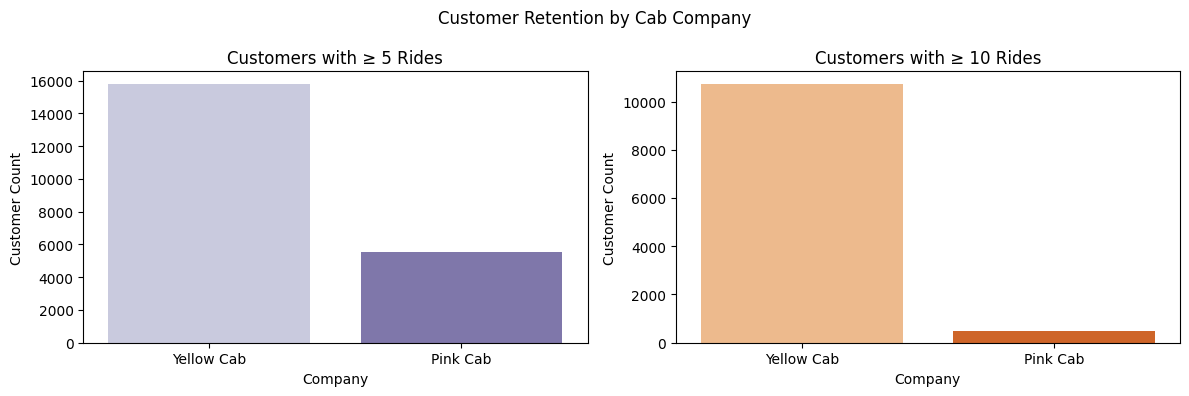

In [ ]:
# Plot both summaries
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

sns.barplot(x=retained_5_summary.index, y=retained_5_summary.values, ax=axs[0], palette='Purples')
axs[0].set_title("Customers with ≥ 5 Rides")
axs[0].set_ylabel("Customer Count")

sns.barplot(x=retained_10_summary.index, y=retained_10_summary.values, ax=axs[1], palette='Oranges')
axs[1].set_title("Customers with ≥ 10 Rides")
axs[1].set_ylabel("Customer Count")

plt.suptitle("Customer Retention by Cab Company")
plt.tight_layout()
plt.savefig("retention_5plus.png.png")
plt.show()


<ipython-input-22-3842470013>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=retained_5_summary.index, y=retained_5_summary.values, palette='Purples')


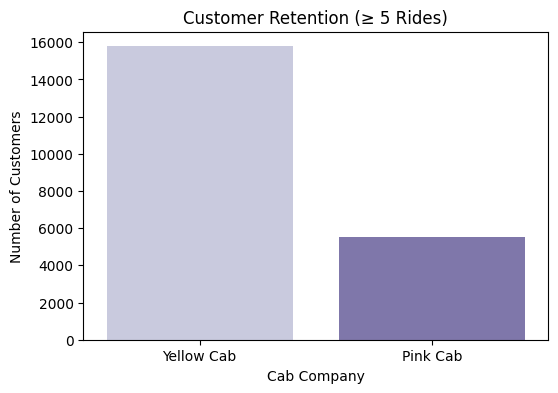

In [ ]:


import matplotlib.pyplot as plt
import seaborn as sns

# Group ride counts per customer per company
retention_df = master_df.groupby(['Customer ID', 'Company']).size().reset_index(name='Ride Count')

# Filter for customers with at least 5 rides
retained_5 = retention_df[retention_df['Ride Count'] >= 5]

# Count how many customers per company
retained_5_summary = retained_5['Company'].value_counts()

# Plot and save
plt.figure(figsize=(6, 4))
sns.barplot(x=retained_5_summary.index, y=retained_5_summary.values, palette='Purples')
plt.title("Customer Retention (≥ 5 Rides)")
plt.ylabel("Number of Customers")
plt.xlabel("Cab Company")
plt.savefig("retention_5plus.png")  # ✅ This saves the chart
plt.show()

